# Mesure du Flux (1Ox TELEMOS)

- Utilisation de la sonde AXUV100, réglage du gain du phantom sur $10^7$ en mode **Low**
- Montage sur lamelle de quartz (ESCO), et ulisitaion du x10 sur TELEMOS (proche de la mise au point avec lame Matthieu), fentes à 0.5 (soit 0.625 sur MM)
- Synchrotron: 450 Ma
- Mesures effectuées à la main avec le multimètre le 14092023
- DM347

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [1]:
%mkdir data
%mkdir figures

mkdir: impossible de créer le répertoire « data »: Le fichier existe
mkdir: impossible de créer le répertoire « figures »: Le fichier existe


## Numérisation des données

In [9]:
GainPhantom = 1e-7
date = '14092023'
W = list(range(230, 340+5, 5))
V = [1.97e-1,
     3.12e-1,
     4.88e-1,
     6.86e-1,
     8.52e-1,
     9.91e-1,
     1.12,
     1.28,
     1.43,
     1.55,
     1.61,
     1.63,
     1.56,
     1.39,
     1.17,
     1.00,
     8.95e-1,
     8.24e-1,
     7.72e-1,
     7.25e-1,
     7.00e-1,
     6.74e-1,
     6.01e-1
    
]

print(W, len(W), len(V))
data = p.DataFrame({'W (nm)': W, 
                    'V (V)': V
                   })
data.to_csv(f'./data/data_diode_TELEMOS_10x_{date}.csv')
data.head()

[230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340] 23 23


W (nm)  V (V)
0     230  0.197
1     235  0.312
2     240  0.488
3     245  0.686
4     250  0.852

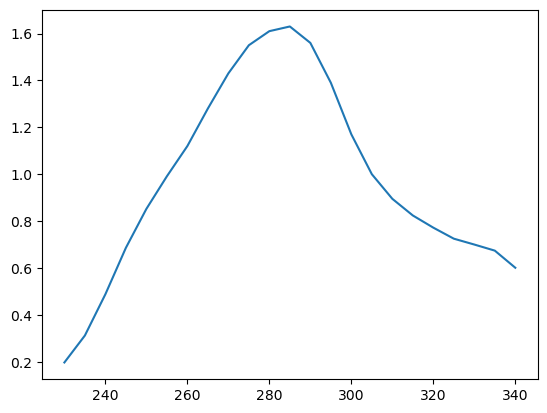

In [8]:
plt.plot(data['W (nm)'], data['V (V)'])

## Chargement des courbes de calibration de la diode

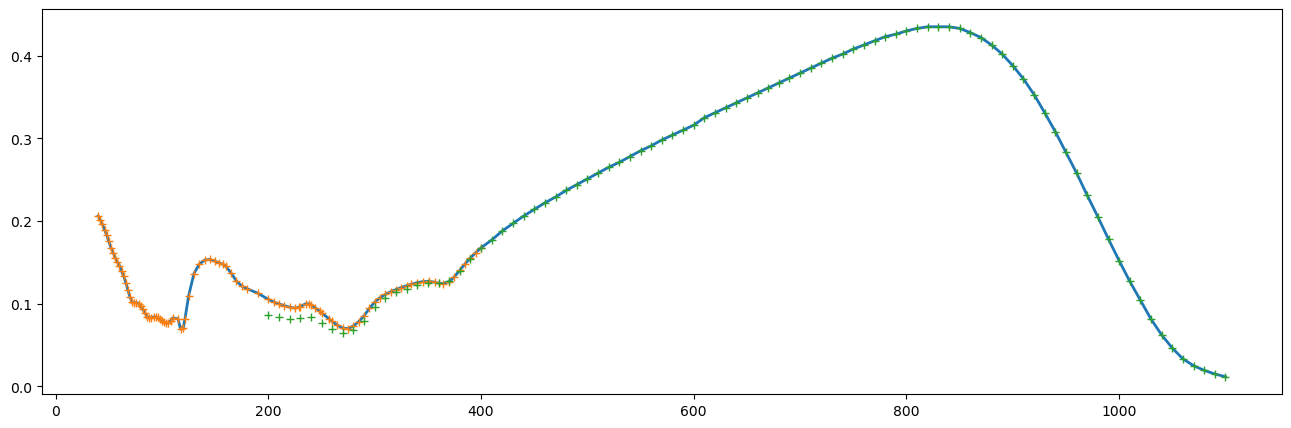

In [10]:
calibUV = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_40-400nm.csv', skiprows=4, names=('W (nm)', 'R (A/W)'))
calibVIS = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_200-1100nm.csv', skiprows=4, names=('W (nm)', 'reflectance', 'R (A/W)', 'External QR', 'Internal QE'))

# On met ensemble les deux séries on prend calibUV puis à la fin on enchaine sur calibVIS
calibMerged = p.concat((calibUV, calibVIS[calibVIS['W (nm)'] > calibUV['W (nm)'].max()]))

# Plot pour voir 
plt.figure(figsize=(16,5))
plt.plot(calibMerged['W (nm)'], calibMerged['R (A/W)'], '-', lw=2)
plt.plot(calibUV['W (nm)'], calibUV['R (A/W)'], '+')
plt.plot(calibVIS['W (nm)'], calibVIS['R (A/W)'], '+')

## Convertion des données pour avoir l'intensité, la puissance et le Flux

- Le flux de photons $\phi$ unité $\frac{photons}{s\, m^2}$ soit des photons par second métres carrés
$$ H = \phi \times \frac{hc}{\lambda}$$
Avec $H$ la puissance par mètre carré $[W/m^2]$, $h$ la constant de Plank, $c$ la célérité de la lumière, et $\lambda$ la longueur d'onde

In [11]:
# Pour avoir le courant I en ampère
data['I (A)'] = data['V (V)'] * GainPhantom

# Pour avoir la puissance (on utilise la calibration que l'on interpole lineairement au bonnes longueus d'ondes)
calib = np.interp(data['W (nm)'], calibMerged['W (nm)'], calibMerged['R (A/W)'])
data['P (W)'] = data['I (A)'] / calib

h = 6.62e-34
c = 2.99e8
data['Flux'] = ( data['P (W)'] * data['W (nm)'] * 10e-9 ) / (c*h)

data.to_csv(f'./data/data_flux_TELEMOS_10x_{date}.csv')
data

W (nm)  V (V)         I (A)         P (W)          Flux
0      230  0.197  1.970000e-08  2.043568e-07  2.374586e+12
1      235  0.312  3.120000e-08  3.126253e-07  3.711613e+12
2      240  0.488  4.880000e-08  4.944276e-07  5.994939e+12
3      245  0.686  6.860000e-08  7.280041e-07  9.010954e+12
4      250  0.852  8.520000e-08  9.583802e-07  1.210455e+13
5      255  0.991  9.910000e-08  1.184068e-06  1.525414e+13
6      260  1.120  1.120000e-07  1.424936e-06  1.871715e+13
7      265  1.280  1.280000e-07  1.732441e-06  2.319397e+13
8      270  1.430  1.430000e-07  2.037037e-06  2.778648e+13
9      275  1.550  1.550000e-07  2.220630e-06  3.085175e+13
10     280  1.610  1.610000e-07  2.202462e-06  3.115569e+13
11     285  1.630  1.630000e-07  2.081737e-06  2.997378e+13
12     290  1.560  1.560000e-07  1.826698e-06  2.676305e+13
13     295  1.390  1.390000e-07  1.474019e-06  2.196827e+13
14     300  1.170  1.170000e-07  1.149312e-06  1.741928e+13
15     305  1.000  1.000000e-07  9.319664e-07  1.436055e+13
16     310  0.895  8.950000e-08  8.048561e-07  1.260523e+13
17     315  0.824  8.240000e-08  7.202797e-07  1.146258e+13
18     320  0.772  7.720000e-08  6.592656e-07  1.065813e+13
19     325  0.725  7.250000e-08  6.066946e-07  9.961490e+12
20     330  0.700  7.000000e-08  5.751849e-07  9.589417e+12
21     335  0.674  6.740000e-08  5.449868e-07  9.223624e+12
22     340  0.601  6.010000e-08  4.792663e-07  8.232404e+12

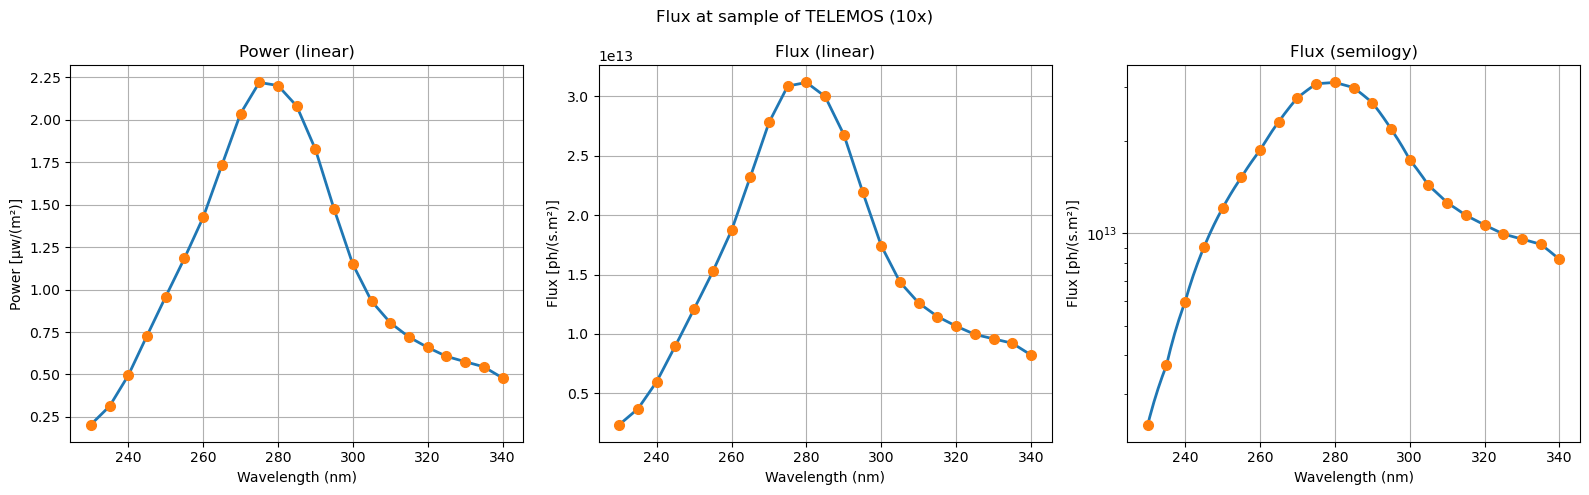

In [12]:
x = np.linspace(data['W (nm)'].min(), data['W (nm)'].max(), 200)
fit = np.interp(x, data['W (nm)'], data['Flux'])

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(data['W (nm)'], data['P (W)']*1e6, '-', lw=2)
plt.plot(data['W (nm)'], data['P (W)']*1e6, 'o', ms=7)
plt.grid()
plt.ylabel('Power [µw/(m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Power (linear)')

plt.subplot(132)
plt.plot(x, fit, lw=2)
plt.plot(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (linear)')

plt.subplot(133)
plt.semilogy(x, fit, lw=2)
plt.semilogy(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (semilogy)')

plt.suptitle('Flux at sample of TELEMOS (10x)')
plt.tight_layout()

plt.savefig(f'./figures/Flux_TELEMOS_10x_{date}.pdf')
plt.savefig(f'./figures/Flux_TELEMOS_10x_{date}.png')